### How Weight can Predict the Broad Jump of players in the NFL combine

In this section I am going to use linear regression on a csv file downloaded from kaggle[[1]]('https://www.kaggle.com/datasets/mrframm/nfl-2020-combine') that contains the data of the players that were invited to the 2020 NFL combine. I have tried doing regression models on NFL data before, however I never really got very far as there are so many variables that pridicting anything is a bit of a nightmare and it gets extremly complex very quickly. However for the purposes of this notebook and demonstration of simple regression I am going to clean a dataframe and simply determine if we can predict the Broad jump of a player based on his weight. (Broad jump is just another term for long jump...Americans)

In [51]:
# Import Pandas
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Statistical arrays
import numpy as np

#Statistical tools
import scipy.stats as ss

In [52]:
cb_data = pd.read_csv("NFL_Combine_2020.csv")

In [53]:
# Take a peek
cb_data.tail()

,Unnamed: 0,Player,Pos,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
332,332,D.J. Wonnum,DL,195,258,4.73,34.5,20.0,123.0,7.25,4.44
333,333,Dom Wood-Anderson,TE,193,261,4.92,35.0,NaN,119.0,NaN,NaN
334,334,David Woodward,LB,188,230,4.79,33.5,16.0,114.0,7.34,4.37
335,335,Chase Young,DL,195,264,NaN,NaN,NaN,NaN,NaN,NaN
336,336,Jabari Zuniga,DL,190,264,4.64,33.0,29.0,127.0,NaN,NaN


First thing I notice in the data is that some of the players have not taken part in each event as there are empty cells from my data (NaNs). Many of these player (especially the top athleats) do not participate in the combine as they do not need to - example above is Chase Young - in 2019/2020 he was a top recruit coming out of college so he did not take part in any events. For the purposes of this excercise I am going the exclude the data of any player that did not take part in ALL events. 

In [54]:
print ("No. of rows before NaNs removed: ", (len(cb_data.index)))
#clean the NaNs
cb_data = cb_data.dropna()

print ("No. of rows after NaNs removed: ", (len(cb_data.index)))

No. of rows before NaNs removed:  337
No. of rows after NaNs removed:  101


In [55]:
cb_data.head()

,Unnamed: 0,Player,Pos,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
6,6,Bradlee Anae,DL,190,257,4.93,31.0,25.0,115.0,7.44,4.43
10,10,Grayland Arnold,CB,175,186,4.59,33.0,12.0,120.0,7.01,4.30
12,12,Joe Bachie,LB,185,230,4.67,33.5,26.0,119.0,6.93,4.34
17,17,Essang Bassey,CB,175,191,4.46,39.5,12.0,128.0,6.95,4.13
18,18,Zack Baun,LB,188,238,4.65,32.5,24.0,115.0,7.00,4.31


### Plot the Data

***

Here I am going to create a scatter plot of the data.

In [68]:
# Create x and y data from data frame
x = cb_data['Wt'].tolist()
y = cb_data['Broad Jump'].tolist()
y

[115.0,
 120.0,
 119.0,
 128.0,
 115.0,
 123.0,
 122.0,
 121.0,
 108.0,
 119.0,
 110.0,
 115.0,
 124.0,
 111.0,
 99.0,
 109.0,
 124.0,
 111.0,
 115.0,
 125.0,
 117.0,
 127.0,
 119.0,
 113.0,
 114.0,
 133.0,
 111.0,
 112.0,
 110.0,
 126.0,
 105.0,
 124.0,
 116.0,
 132.0,
 94.0,
 98.0,
 124.0,
 124.0,
 119.0,
 136.0,
 121.0,
 125.0,
 121.0,
 111.0,
 106.0,
 124.0,
 133.0,
 131.0,
 109.0,
 118.0,
 104.0,
 119.0,
 124.0,
 123.0,
 112.0,
 109.0,
 132.0,
 113.0,
 118.0,
 122.0,
 114.0,
 93.0,
 110.0,
 121.0,
 119.0,
 138.0,
 129.0,
 106.0,
 119.0,
 125.0,
 124.0,
 113.0,
 107.0,
 121.0,
 107.0,
 123.0,
 113.0,
 124.0,
 121.0,
 116.0,
 127.0,
 118.0,
 123.0,
 109.0,
 97.0,
 126.0,
 114.0,
 120.0,
 133.0,
 122.0,
 133.0,
 117.0,
 102.0,
 101.0,
 110.0,
 121.0,
 111.0,
 121.0,
 120.0,
 123.0,
 114.0]

Text(0, 0.5, 'Jump Height (cm)')

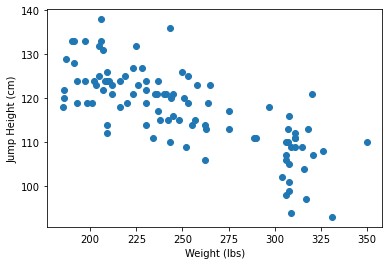

In [57]:
# Scatter plot
plt.scatter(x,y)
plt.xlabel('Weight (lbs)')
plt.ylabel("Jump Height (cm)")

So here I can see that the data points are indicating a negative rekationship between these two variables as the data points are on a downward trajectory from the top left to the bottom right of the plot.

Below I will use the linregress tool in scipy to get the pvalue of the data[[2]]('https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html'). This is to prove that the values of a players weight (x) is directly related to the players broadjump.  
The linregress function in the scipy.stats module is a convenient tool for performing linear regression analysis on a set of data points, it calculates several important parameters of the linear regression model, including the slope, intercept, correlation coefficient (r-value), p-value, and standard error.

In [83]:
res = ss.linregress(x, y)
print (res)

LinregressResult(slope=-0.15541706775150319, intercept=156.36316548846753, rvalue=-0.7532944104659515, pvalue=1.0151183028305032e-19, stderr=0.013637453646258672, intercept_stderr=3.463785907596083)


After performing the linear regression analysis, the linregress function returns a LinregressResult object, which contains several statistical values that describe the linear regression model. Here I will go through some of the results we will use in our model. 

**pvalue:** This is the p-value associated with the null hypothesis that there is no significant linear relationship between the variables x and y. A small p-value (usually less than 0.05) indicates that the linear relationship is statistically significant. In the output, the pvalue is approximately 1.0151e-19, which is extremely small (almost 0) and suggests a highly significant linear relationship.(This is not actually used in the model but the miniscule score gives creedence to generating a model.)

**slope:** This is the slope of the linear regression line, which represents the change in the dependent variable (y) for a unit change in the independent variable (x). In the output, the slope is approximately -0.1554.

**intercept:** This is the intercept of the linear regression line, which is the value of the dependent variable (y) when the independent variable (x) is zero. In the output, the intercept is approximately 156.3632.

Now using the results above I will create a the preditive data to fit the line.

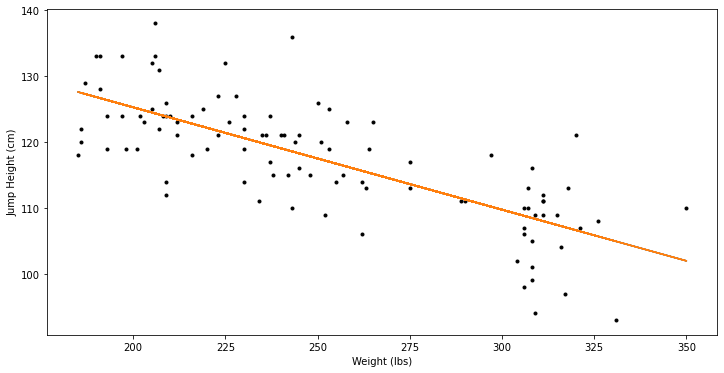

In [91]:
# Creating predictive data
y_pred = res.intercept + res.slope * np.array(x)

# Create a plot
fig, ax = plt.subplots(figsize = (12,6))

# PLot x and y
ax.plot(x,y, 'k.')

# PLot x and predictive data(y_pred) on x
ax.plot(x, y_pred)

# x and y axis labels
plt.xlabel('Weight (lbs)')
plt.ylabel("Jump Height (cm)")

ax.plot(x,y_pred)

### Linear Regression using the polyfit function
Below I will do the same thing, except this time instead of creating a formula to fit the line, I will ask they polyfit function in the scipy library to do this for me. 

In [92]:
# To use the polyfit function the data needs to be in numpy arrays
x = np.asarray(x)
y = np.asarray(y)

# use x and y to find original parameters used to create data
params = np.polyfit(x, y, 1)
params

array([-1.55417068e-01,  1.56363165e+02])

The first value -1.55417068e-01 is the slope of the linear regression line. This value indicates the rate of change of the dependent variable (y) with respect to a unit change in the independent variable (x). In this case, as expected since we saw this above, the negative value suggests a negative correlation between x and y, meaning that as x increases, y tends to decrease.

The second value 1.56363165e+02 is the intercept of the linear regression line. It represents the value of the dependent variable (y) when the independent variable (x) is zero. In this case, it suggests that when x is zero, the predicted value of y is approximately 156.36.

The e notation in the values represents scientific notation. For example, -1.55417068e-01 is equivalent to -0.155417068, and 1.56363165e+02 is equivalent to 156.363165.  
You will notice these values are almost identical to the values returned to me when I ran the linregress function in the previous section.

In summary, the params array provided represents the coefficients of the linear regression line that best fits the data points (x, y). The linear equation that describes this relationship is approximately:
y=−0.1554⋅x+156.363
This equation can be used to make predictions based on the given data and the fitted linear model.

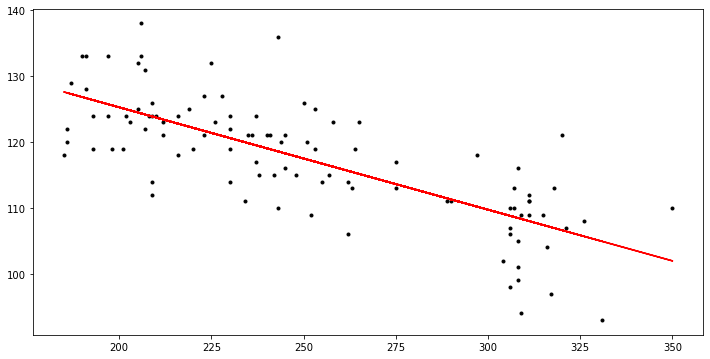

In [89]:
 # Create a plot
fig, ax = plt.subplots(figsize = (12,6))

# PLot x and y
ax.plot(x,y, 'k.')

# PLot x and params on x
ax.plot(x, params[0] * x + params[1], 'r-')

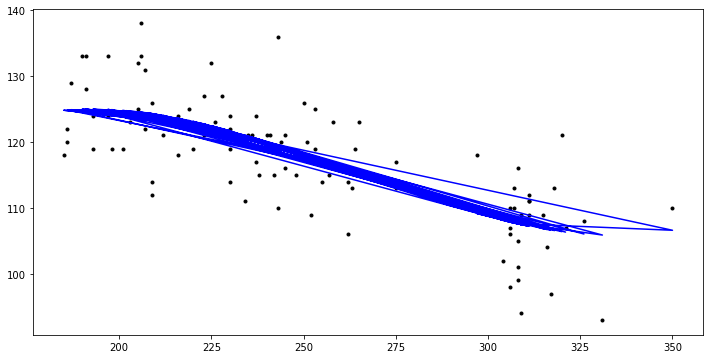

In [87]:
# Degrees of freedom
deg = 3

# Use x and y to try to find the original parameters
params = np.polyfit(x, y, deg)

# Create a plot
fig, ax = plt.subplots(figsize = (12,6))

#plot x and y
ax.plot(x, y, 'k.')

# PLot x and params on x
ax.plot(x, np.polyval(params, x), 'b-')